Read sales and buys

In [ ]:
import pandas as pd

initial_stock=0
# minsan = '932523804' # solari
# minsan = '012745182' # regolare TACHIPIRINA*16CPR DIV 1000MG
#initial_stock=8
# minsan = '012745028' # TACHIPIRINA*10CPR DIV 500MG
# minsan = '034329122' # TACHIPIRINA FLASHTAB*12CPR 250
# minsan = '012745093' # TACHIPIRINA*20CPR DIV 500MG
# minsan = '907996108' # sacchetto - ignorare
# minsan = '930873688'

# minsan = '932707565' # ACCU-CHEK AVIVA 25STR

minsan = '004763114' # ASPIRINA C*10CPR EFF 400+240MG (TO ma bello perchè stagionale, vedi autocorr)
initial_stock=131
# minsan = '024840074' # acquisti molto regolari
# initial_stock=220
# minsan = '011782012' # farmaco SINTROM*20CPR 4MG
# minsan = '907926152' # prodotto non in banca dati mia
# minsan = '023853031' # CEFAZOLINA TEVA*IM 1F 1G+F 4ML (stock sballato da molti sospesi)
# minsan = '031981311' # PANTORC*14CPR GASTR 40MG
# minsan = '036635011' # DIBASE*OS GTT 10ML 10000UI/ML
# minsan = '024402051' # EUTIROX*50CPR 75MCG
# initial_stock=16
# minsan = '016366027' # COUMADIN*30CPR 5MG
# initial_stock=8
data_dir='data'

import common.data as data

sales_data = data.read_sell(minsan, data_dir)
buy_data = data.read_buy(minsan, data_dir, initial_stock = initial_stock)

Plot autocorrelation

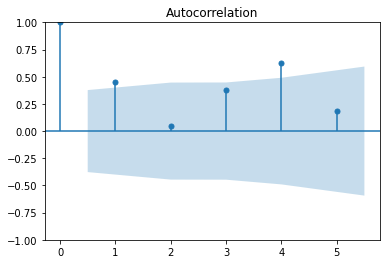

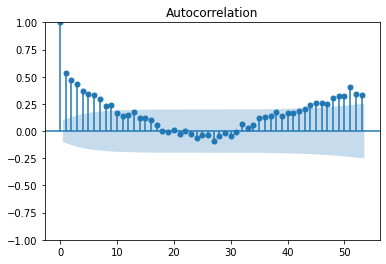

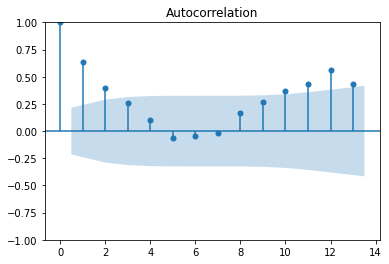

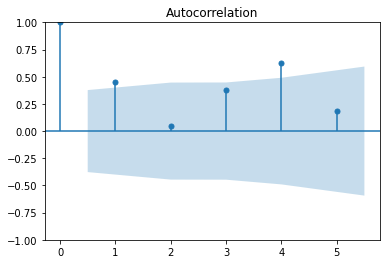

In [2]:
import datetime
start_date_fill = datetime.date(2015, 1, 1)

buy_sell_data, weekly_index, monthly_index, quarter_index, quad_index = data.insights(buy_data, sales_data, start_date_fill)

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

weekly_sales_data = buy_sell_data.loc[weekly_index].weekly_sell_qta
monthly_sales_data = buy_sell_data.loc[monthly_index].monthly_sell_qta
quarter_sales_data = buy_sell_data.loc[quarter_index].quarter_sell_qta

plot_acf(x=weekly_sales_data[1:-1], lags=53)
plot_acf(x=monthly_sales_data[1:-1], lags=13)
plot_acf(x=quarter_sales_data[1:-1], lags=5)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_buy_sell_array = scaler.fit_transform(buy_sell_data)
buy_sell_data_scaled = buy_sell_data
# buy_sell_data_scaled = pd.DataFrame(scaled_buy_sell_array, index=buy_sell_data.index, columns=buy_sell_data.columns)

Visualize habits about lags in days between one buy and the next.

In [8]:
import plotly.graph_objects as go

fig = go.Figure(layout_title_text=f'{data_dir}: {minsan}')
fig = fig.add_trace(go.Line(x=buy_sell_data_scaled.index, y = buy_sell_data_scaled.sell_qta, name='sales by day'))
fig = fig.add_trace(go.Line(x=weekly_index, y = buy_sell_data_scaled.loc[weekly_index].weekly_sell_qta, name='sales by week'))
fig = fig.add_trace(go.Line(x=monthly_index, y = buy_sell_data_scaled.loc[monthly_index].monthly_sell_qta, name='sales by month'))
fig = fig.add_trace(go.Line(x=quarter_index, y = buy_sell_data_scaled.loc[quarter_index].quarter_sell_qta, name='sales by quarter'))
fig = fig.add_trace(go.Line(x=weekly_index, y = buy_sell_data_scaled.loc[weekly_index].avg_weekly_sell_qta, name='avg sales by week'))
fig = fig.add_trace(go.Line(x=monthly_index, y = buy_sell_data_scaled.loc[monthly_index].avg_monthly_sell_qta, name='avg sales by month'))
fig = fig.add_trace(go.Line(x=quarter_index, y = buy_sell_data_scaled.loc[quarter_index].avg_quarter_sell_qta, name='avg sales by quarter'))

fig = fig.add_trace(go.Line(x=buy_sell_data_scaled.index, y = buy_sell_data_scaled.buy_qta, name='total buy'))
fig = fig.add_trace(go.Line(x=buy_sell_data_scaled.index, y = buy_sell_data_scaled.buy_delivered, name='total buy delivered'))
fig = fig.add_trace(go.Line(x=buy_sell_data_scaled.index, y = buy_sell_data_scaled.stock, name='stock'))
fig = fig.add_trace(go.Line(x=buy_sell_data_scaled.index, y = buy_sell_data_scaled.days_lag, name='days lag'))

fig.show()

NameError: name 'data_dir' is not defined

In [7]:
import tensorflow as tf